# A Tale of Two Cities: Comparative Temporal Analysis

**Task:** Compare weekly and seasonal patterns to identify similarities and differences in incident reports between San Francisco and San Jose.

# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 7)

# 2. Load and Combine Datasets

We load both cleaned datasets here. We'll add a City column to each, which is the key to comparing them.

In [2]:
# Load SF Data
df_sf = pd.read_csv(
    '../data/processed/sf_incidents_cleaned.csv',
    index_col='Incident DateTime',
    parse_dates=True
)
df_sf['City'] = 'San Francisco'

print(f"Loaded {len(df_sf):,} rows from San Francisco.")

# Load SJ Data
df_sj = pd.read_csv(
    '../data/processed/sj_calls_cleaned.csv',
    index_col='Incident DateTime',
    parse_dates=True
)
df_sj['City'] = 'San Jose'

print(f"Loaded {len(df_sj):,} rows from San Jose.")

# Combine into one master DataFrame
df_combined = pd.concat([df_sf, df_sj])

print(f"Combined DataFrame created with {len(df_combined):,} total rows.")
df_combined.head()

Loaded 815,753 rows from San Francisco.
Loaded 1,161,294 rows from San Jose.
Combined DataFrame created with 1,977,047 total rows.


,Incident_High_Level_Category,Resolution,Neighborhood,Police_District,Latitude,Longitude,Hour,Day,Month,Year,Day_of_Week,Day_of_Week_Name,Month_Name,Quarter,Is_Weekend,City
Incident DateTime,,,,,,,,,,,,,,,,
2025-08-27 00:37:00,Violent,Open or Active,Lone Mountain/USF,Park,37.780415,-122.449013,0,27,8,2025,2,Wednesday,August,3,0,San Francisco
2025-07-17 15:00:00,Fraud,Open or Active,Lone Mountain/USF,Park,37.775177,-122.451355,15,17,7,2025,3,Thursday,July,3,0,San Francisco
2025-08-23 21:30:00,Theft/Property,Open or Active,Hayes Valley,Northern,37.774551,-122.422501,21,23,8,2025,5,Saturday,August,3,1,San Francisco
2025-08-15 12:00:00,Non-Criminal/Admin,Open or Active,Haight Ashbury,Park,37.769661,-122.449646,12,15,8,2025,4,Friday,August,3,0,San Francisco
2025-08-15 21:45:00,Theft/Property,Open or Active,Haight Ashbury,Park,37.771572,-122.442184,21,15,8,2025,4,Friday,August,3,0,San Francisco


# 3. Compare Weekly Patterns

### "What does a typical week look like in each city?"

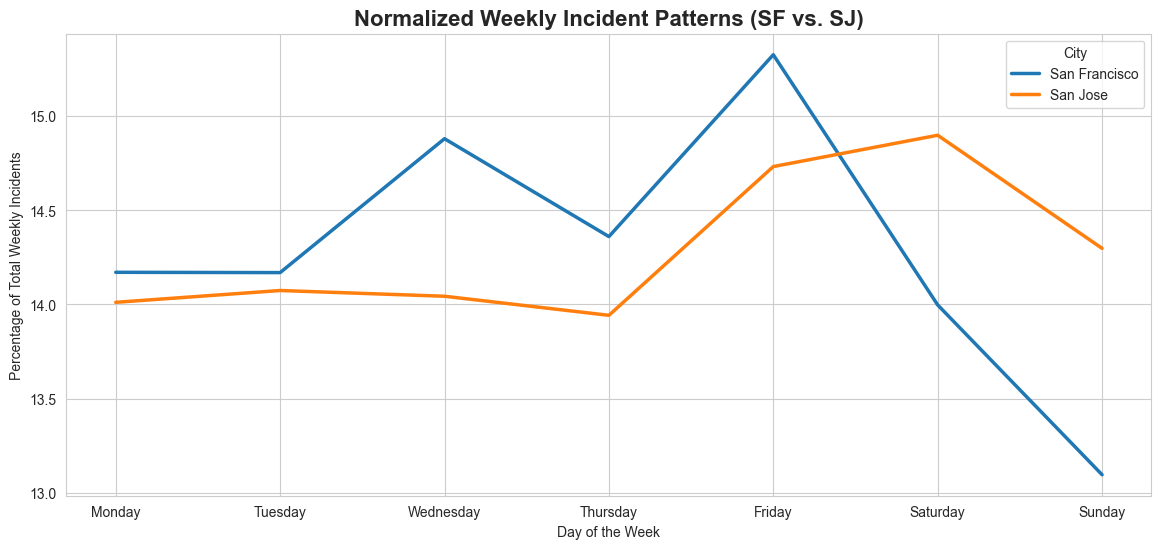

In [3]:
# Group by City and Day of Week
weekly_data = df_combined.groupby(['City', 'Day_of_Week_Name']).size().reset_index(name='Count')

# Normalize: Calculate percentage of total for each city
total_counts = df_combined.groupby('City').size().to_dict()
weekly_data['Percentage'] = weekly_data.apply(lambda row: 100 * row['Count'] / total_counts[row['City']], axis=1)

# Define the correct day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekly_data['Day_of_Week_Name'] = pd.Categorical(
    weekly_data['Day_of_Week_Name'],
    categories=day_order,
    ordered=True
)

# Plot
plt.figure(figsize=(14, 6))
ax = sns.lineplot(
    data=weekly_data, 
    x='Day_of_Week_Name', 
    y='Percentage', 
    hue='City', 
    lw=2.5
)

ax.set_title('Normalized Weekly Incident Patterns (SF vs. SJ)', fontsize=16, weight='bold')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Percentage of Total Weekly Incidents')
ax.legend(title='City')

# Save the plot
plt.savefig('../reports/figures/01_weekly_incident_patterns.png', dpi=300, bbox_inches='tight')

plt.show()

# 4. Compare Seasonal (Monthly) Patterns

### "Are there crime seasons in each city?"

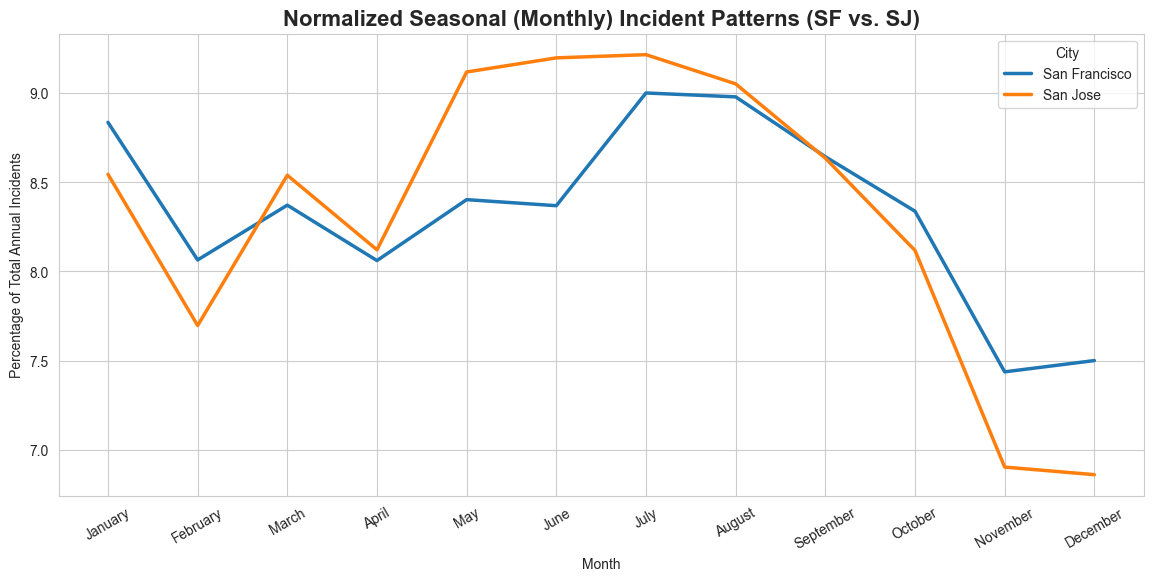

In [4]:
# Group by City and Month
monthly_data = df_combined.groupby(['City', 'Month_Name']).size().reset_index(name='Count')

# Normalize: Calculate percentage of total for each city
total_counts = df_combined.groupby('City').size().to_dict()
monthly_data['Percentage'] = monthly_data.apply(lambda row: 100 * row['Count'] / total_counts[row['City']], axis=1)

# Define the correct month order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Apply the order by converting the column to a Categorical type
monthly_data['Month_Name'] = pd.Categorical(
    monthly_data['Month_Name'],
    categories=month_order,
    ordered=True
)

# Plot
plt.figure(figsize=(14, 6))
ax = sns.lineplot(
    data=monthly_data, 
    x='Month_Name', 
    y='Percentage', 
    hue='City', 
    lw=2.5
)

ax.set_title('Normalized Seasonal (Monthly) Incident Patterns (SF vs. SJ)', fontsize=16, weight='bold')
ax.set_xlabel('Month')
ax.set_ylabel('Percentage of Total Annual Incidents')
ax.legend(title='City')
plt.xticks(rotation=30)

# Save the plot
plt.savefig('../reports/figures/02_monthly_incident_patterns.png', dpi=300, bbox_inches='tight')

plt.show()

# 5. Compare Hourly Patterns

### This shows the daily rhythm of each city.

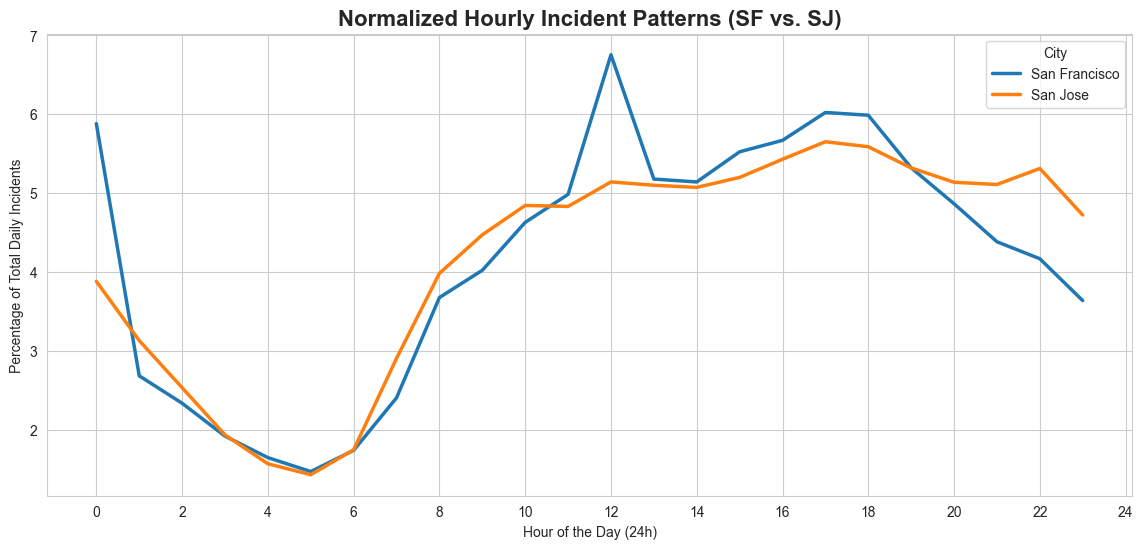

In [5]:
# Group by City and Hour
hourly_data = df_combined.groupby(['City', 'Hour']).size().reset_index(name='Count')

# Normalize: Calculate percentage of total for each city
total_counts = df_combined.groupby('City').size().to_dict()
hourly_data['Percentage'] = hourly_data.apply(lambda row: 100 * row['Count'] / total_counts[row['City']], axis=1)

# Plot
plt.figure(figsize=(14, 6))
ax = sns.lineplot(
    data=hourly_data, 
    x='Hour', 
    y='Percentage', 
    hue='City',
    lw=2.5
)

ax.set_title('Normalized Hourly Incident Patterns (SF vs. SJ)', fontsize=16, weight='bold')
ax.set_xlabel('Hour of the Day (24h)')
ax.set_ylabel('Percentage of Total Daily Incidents')
ax.set_xticks(range(0, 25, 2))
ax.legend(title='City')

# Save the plot
plt.savefig('../reports/figures/03_hourly_incident_patterns.png', dpi=300, bbox_inches='tight')

plt.show()

# 6. Categorical Analysis: What types of incidents occur?

### This section compares the types of incidents reported in each city. We'll use a grouped bar chart to see if the incident mix is different.

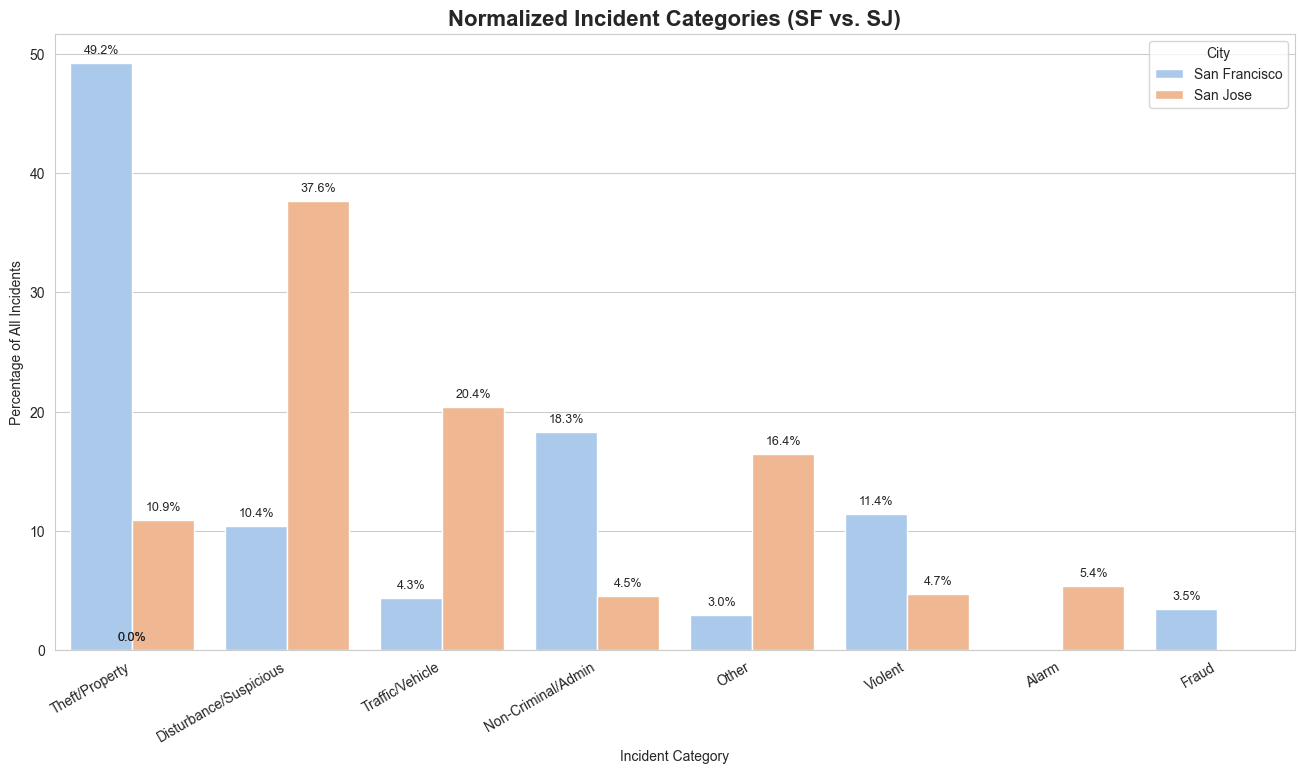

In [6]:
# Group by City and High-Level Category
category_data = df_combined.groupby(['City', 'Incident_High_Level_Category']).size().reset_index(name='Count')

# Normalize: Calculate percentage of total for each city
total_counts = df_combined.groupby('City').size().to_dict()
category_data['Percentage'] = category_data.apply(lambda row: 100 * row['Count'] / total_counts[row['City']], axis=1)

# Sort for better plotting
category_data.sort_values(by='Percentage', ascending=False, inplace=True)

# 4. Plot
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    data=category_data,
    x='Incident_High_Level_Category',
    y='Percentage',
    hue='City',
    palette='pastel'
)

ax.set_title('Normalized Incident Categories (SF vs. SJ)', fontsize=16, weight='bold')
ax.set_xlabel('Incident Category')
ax.set_ylabel('Percentage of All Incidents')
ax.legend(title='City', loc='upper right')
plt.xticks(rotation=30, ha='right')

# Add percentage labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=9)

# Save the plot
plt.savefig('../reports/figures/04_categorical_incident_patterns.png', dpi=300, bbox_inches='tight')

plt.show()

# 6. Weekly Patterns by Category

### This analysis helps us understand what's driving the weekday peak in SJ and the weekend peak in SF.

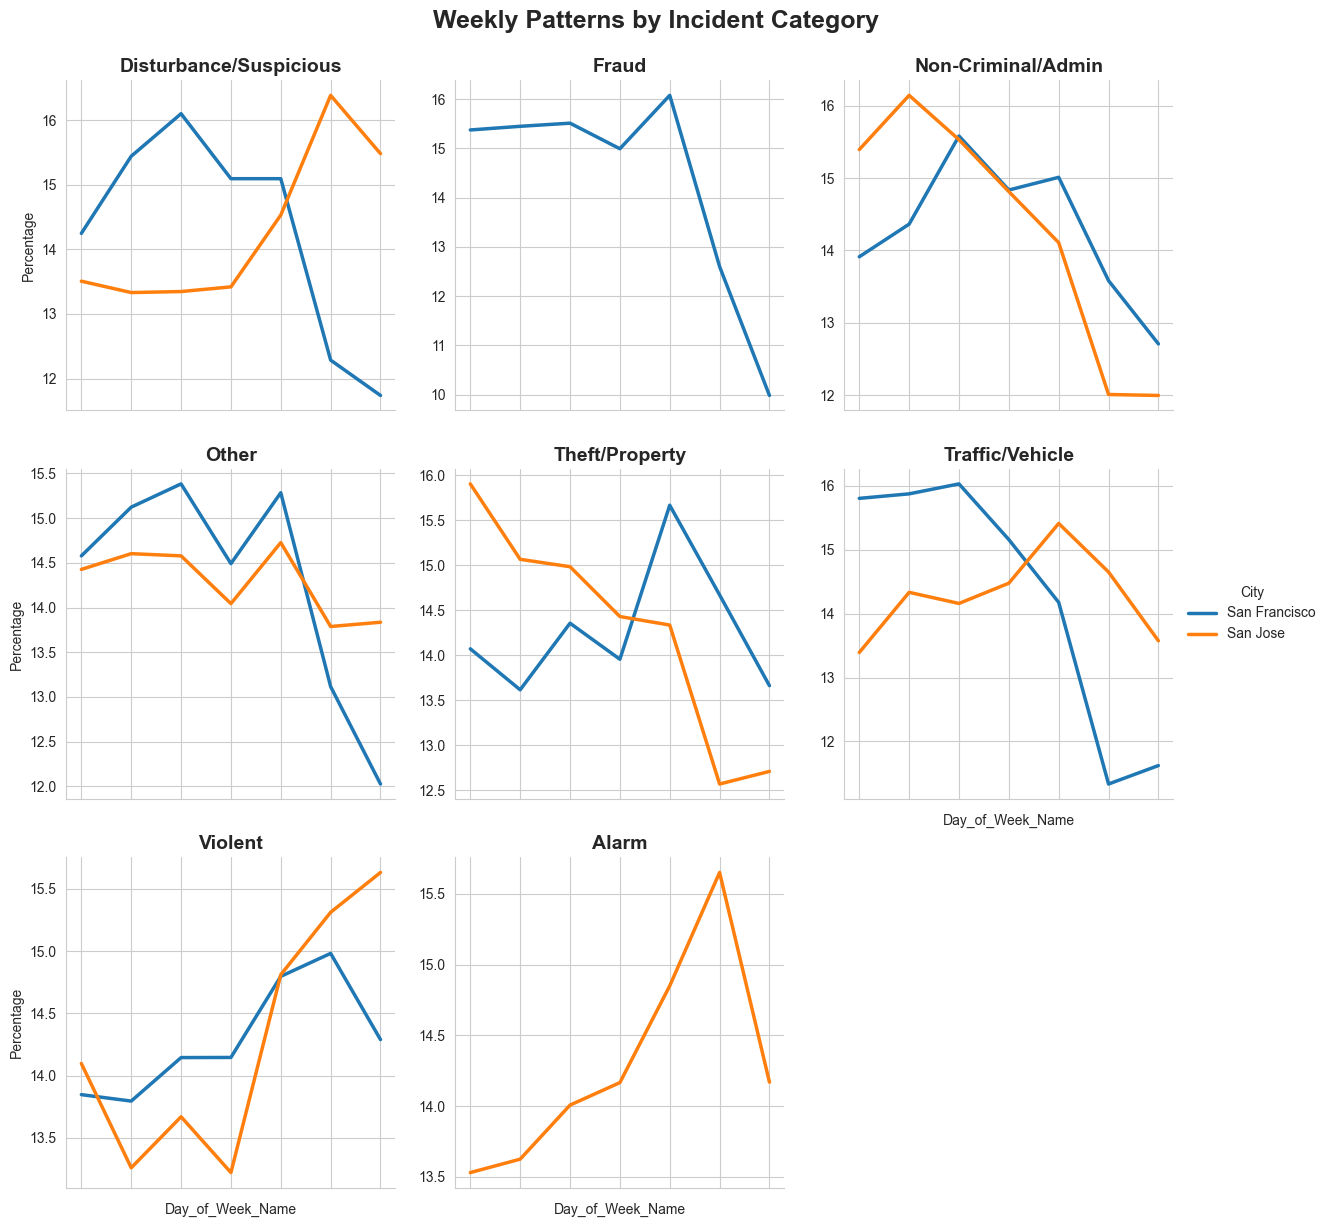

In [7]:
# Group by City, Category, and Day of Week
weekly_cat_data = df_combined.groupby([
    'City', 
    'Incident_High_Level_Category', 
    'Day_of_Week_Name'
]).size().reset_index(name='Count')

# Normalize: Calculate percentage *within each City-Category group*
category_totals = weekly_cat_data.groupby(
    ['City', 'Incident_High_Level_Category']
)['Count'].sum().reset_index(name='Category_Total')

weekly_cat_data = weekly_cat_data.merge(
    category_totals, 
    on=['City', 'Incident_High_Level_Category']
)

weekly_cat_data['Percentage'] = 100 * weekly_cat_data['Count'] / weekly_cat_data['Category_Total']

# Define day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_cat_data['Day_of_Week_Name'] = pd.Categorical(
    weekly_cat_data['Day_of_Week_Name'],
    categories=day_order,
    ordered=True
)

plot_data = weekly_cat_data.dropna(subset=['Incident_High_Level_Category'])

# Plot a FacetGrid
g = sns.FacetGrid(
    data=plot_data,
    col="Incident_High_Level_Category",
    hue="City",
    col_wrap=3,
    height=4,
    sharey=False
)

g.map(sns.lineplot, "Day_of_Week_Name", "Percentage", lw=2.5)
g.add_legend()
g.set_titles("{col_name}", size=14, weight='bold')
g.set_xticklabels(rotation=45)
g.fig.suptitle('Weekly Patterns by Incident Category', y=1.03, fontsize=18, weight='bold')

g.set_xticklabels(rotation=45)

# Save the plot
plt.savefig('../reports/figures/05_weekly_by_category.png', dpi=300, bbox_inches='tight')

plt.show()

# 7. Year-Over-Year (YoY) Trends

### This analysis moves beyond "flattened" patterns to show the long-term incident trends from 2018-2024. We'll exclude 2025 as it contains only partial data.

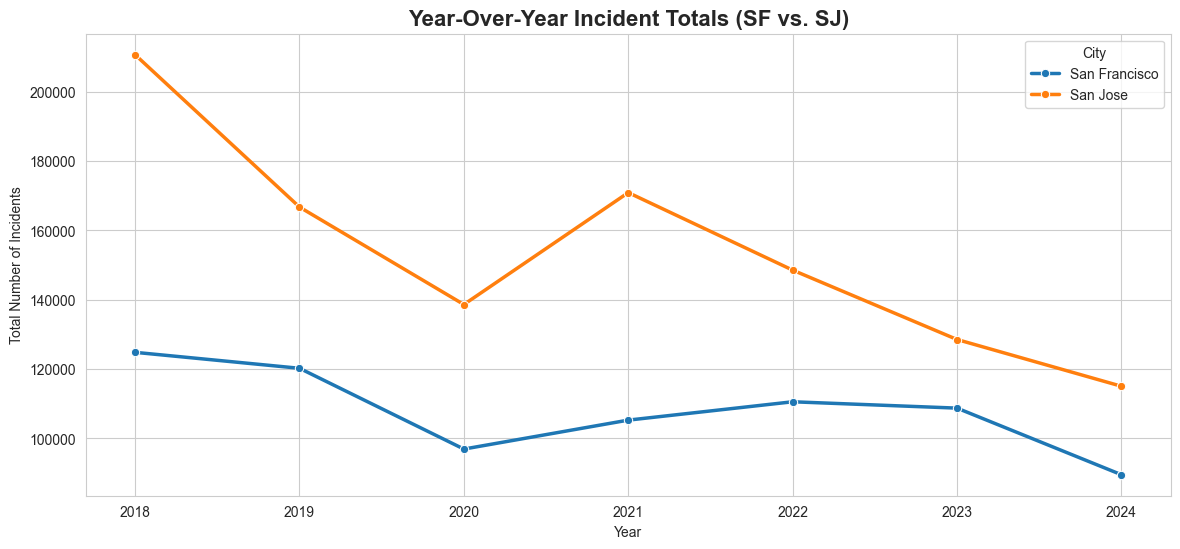

In [8]:
# Group by Year and City
yoy_data = df_combined.query("Year < 2025").groupby(['Year', 'City']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(14, 6))
ax = sns.lineplot(
    data=yoy_data,
    x='Year',
    y='Count',
    hue='City',
    lw=2.5,
    marker='o'
)

ax.set_title('Year-Over-Year Incident Totals (SF vs. SJ)', fontsize=16, weight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Incidents')
ax.set_xticks(yoy_data['Year'].unique())
ax.legend(title='City')

# Save the plot
plt.savefig('../reports/figures/06_yoy_trends.png', dpi=300, bbox_inches='tight')

plt.show()